In [1]:
# this program is aming at evaluating the result with correlation coefficient
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn import preprocessing

In [2]:
#wells = ['19A', 'BT2', 'SR', 'F1B']
wells = ['BT2','19A', 'SR', 'F1B']
#wells = ['SR', '19A', 'BT2', 'F1B']
#wells = ['F1B','19A', 'BT2', 'SR']

well_path = './'
data_all = []
for well in wells:
    data_tmp = np.load(well_path + well + '.npy')
    data_all.append(data_tmp)
idx1 = 0  # use 19A as the blind test
idx2 = 1
N1 = len(data_all[idx1])
N2 = len(data_all[idx2])
print(N1, N2)
blind_ori = data_all[idx1]

data_merge =np.concatenate((data_all[0], data_all[1], data_all[2], data_all[3]), axis=0)  # Merge all well data together
print('The merged data shape is:', data_merge.shape)

features = data_merge[N1:, 1:7]
label_norm = data_merge[N1:, 7]
print(features.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_norm, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_blind = data_merge[0:N1, 1:7]
y_blind = data_merge[0:N1, 7]
X_train_well = data_merge[N1:N1+N2, 1:7]
y_train_well = data_merge[N1:N1+N2, 7]

4057 1930
The merged data shape is: (9894, 10)
(5837, 6)
(4961, 6) (876, 6) (4961,) (876,)


In [3]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
estimator = GradientBoostingRegressor(**params)

estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
y_blind_pred = estimator.predict(X_blind)

In [4]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.9190441322527709

In [5]:
y_train_pred = estimator.predict(X_train)
r2_score(y_train_pred, y_train)

0.9394801059131442

In [6]:
#Compute R-Square value for blind set
from sklearn.metrics import r2_score
BlindR2Value = r2_score(y_blind,y_blind_pred)
print("Training Set R-Square=", BlindR2Value)

Training Set R-Square= 0.710683731195259


In [7]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_blind,y_blind_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.395785


In [8]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.144300


In [9]:
blind_real = y_blind 
blind_pred = y_blind_pred

3168.0725 4219.3467


(1.5, 6)

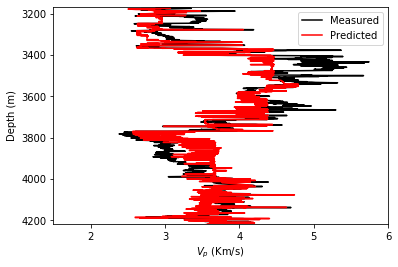

In [10]:
ztop = np.min(data_merge[0:N1, 0]) - 2.0
zbot = np.max(data_merge[0:N1, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(1.5, 6)

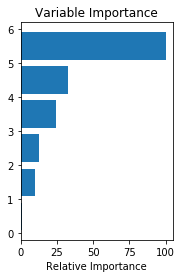

In [11]:
# #############################################################################
# Plot feature importance
feature_importance = estimator.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()